In [60]:
import torch
import matplotlib.pyplot as plt

In [61]:
torch.manual_seed(0)

In [62]:
# Create data
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [63]:
def plot_predictions(train_data, 
                     train_labels, 
                     test_data, 
                     test_labels, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

40 40 10 10


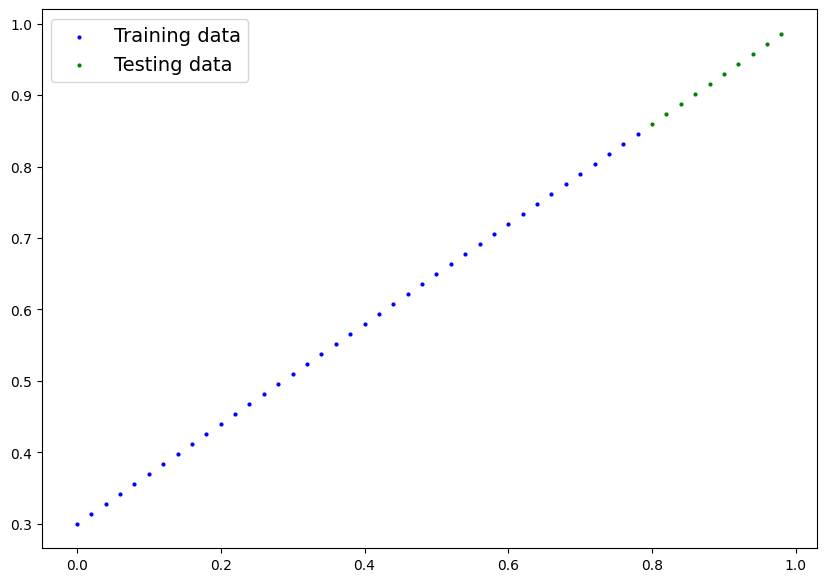

In [64]:
# Bad splitting strategy:
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(len(X_train), len(y_train), len(X_test), len(y_test))
plot_predictions(X_train, y_train, X_test, y_test)

40 10
40 40 10 10


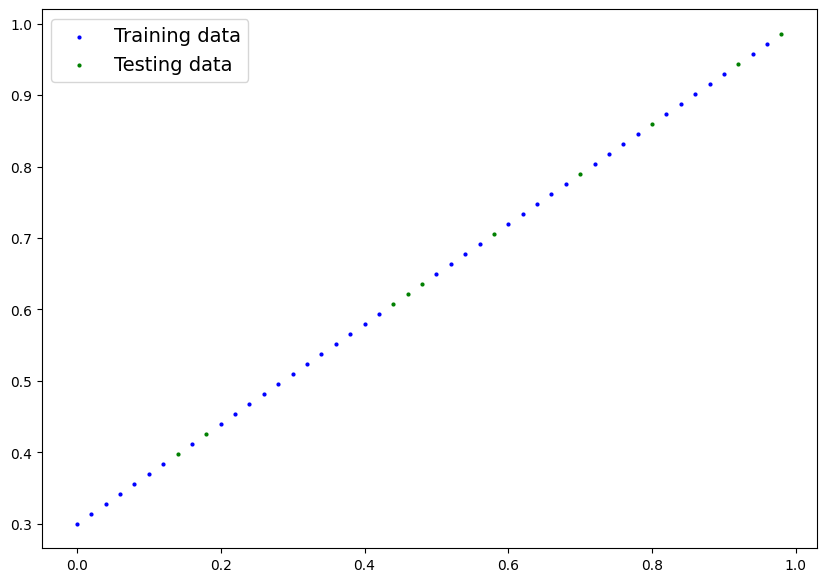

In [65]:
# Better splitting strategy
from torch.utils.data import random_split, TensorDataset

# First, create a tensor dataset
data = TensorDataset(X, y)

train_data, test_data = random_split(data, [int(0.8 * len(data)), int(0.2 * len(data))], generator=torch.Generator().manual_seed(42))
# print(train_data, test_data)
print(len(train_data), len(test_data))

# train_data and test_data are now subsets, which can be used as a type of generator
# Ideally you never have to manually pull out the data and instead use a DataLoader
# with a model to train, but we can pull these out in a hacky way to visualize the split
X_train, y_train = train_data[:]
X_test, y_test = test_data[:]
print(len(X_train), len(y_train), len(X_test), len(y_test))
plot_predictions(X_train, y_train, X_test, y_test)